# **Exercise**  

## **DataSet**  

> DataSet of hr-analytics from kaggle

## **Tasks**  

1. Perform EDA to figure out which variable has direct and clear impact on employee retention.
2. Plot bar charts showing the impact of employee salaries on retention.
3. Plot bar charts showing correlation between department and employee retention.
4. Build logistic regression model using using variables that were narrowed down in step 1.
5. Measure the accuracy of model.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

## _**Performing EDA**_

### Step 1. Data Prepration

In [5]:
df = pd.read_csv('resources/HR.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [6]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Step 3. Univariate Analysis  

> Understanding each variable individually

#### 1. Target Variable Distribution

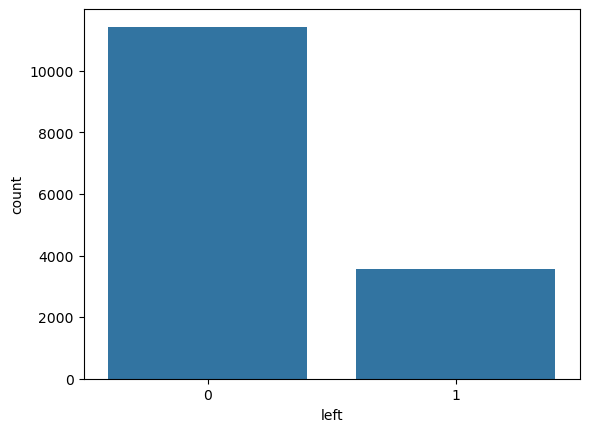

In [9]:
df['left'].value_counts(normalize=True)
sns.countplot(x='left', data=df);

>   
>  This shows that retention rate of employees is good
>   

#### 2. Numerical Distribution

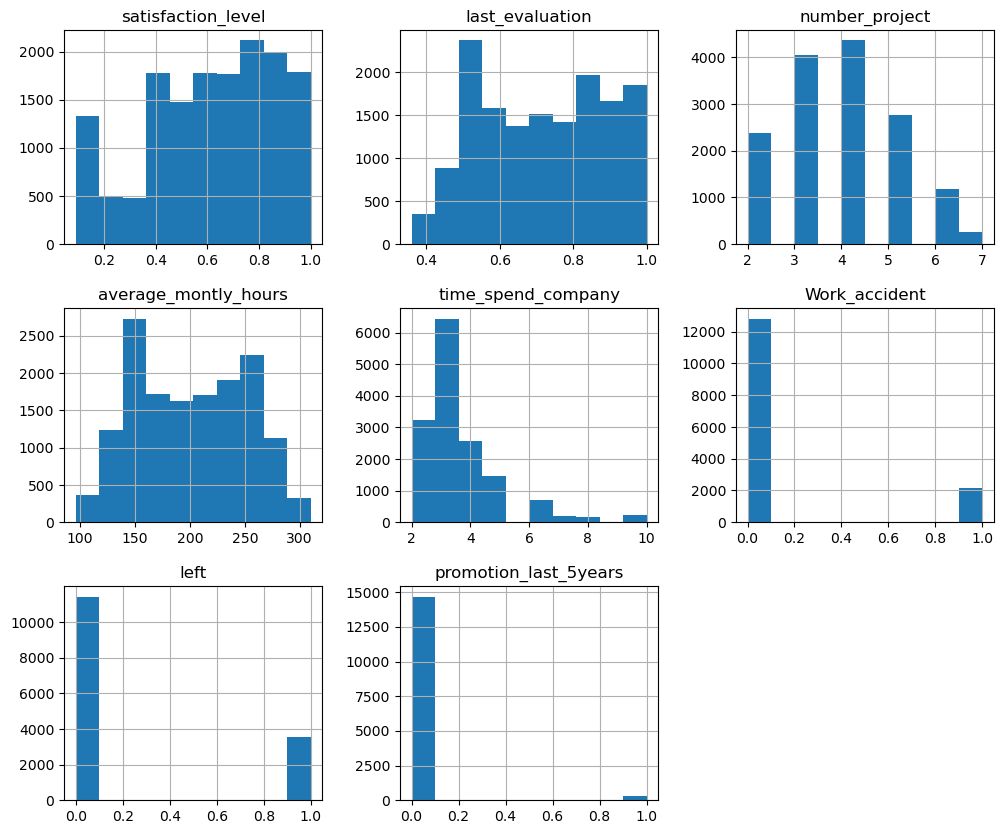

In [10]:
df.hist(figsize=(12,10))
plt.savefig('Numerical_Distribution.png')

#### Summary of Numerical Distributions  

| Feature | Shape | Insight | Possible Link to Retention |
|----------|--------|----------|-----------------------------|
| `satisfaction_level` | Bimodal | Employees either very satisfied or very unsatisfied | **Strong** |
| `last_evaluation` | Fairly uniform | Slightly high scores — overachievers | **Moderate** |
| `number_project` | Normal (3–5) | Extremes may increase attrition | **Moderate** |
| `average_montly_hours` | Trimodal | Overworked employees may leave | **Strong** |
| `time_spend_company` | Right-skewed | Few long-tenured employees | **Moderate** |
| `Work_accident` | Imbalanced | Rare events | **Weak** |
| `promotion_last_5years` | Highly imbalanced | Lack of promotion opportunities | **Strong** |


#### 3. Categorical Distribution

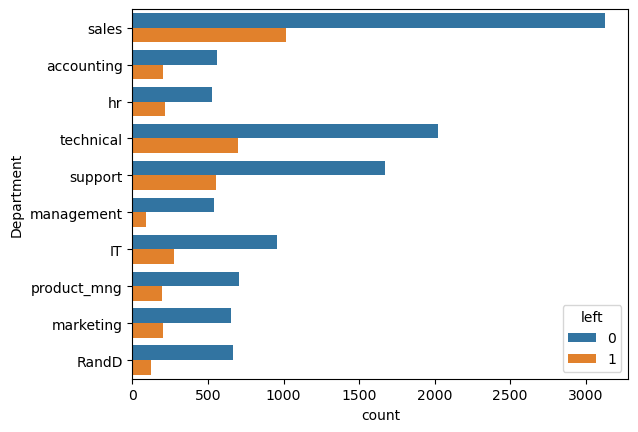

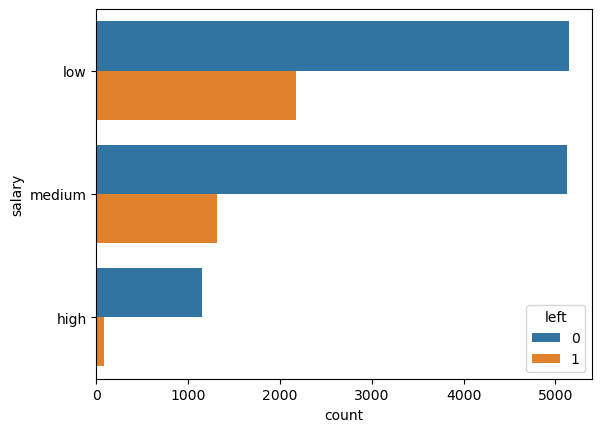

In [11]:
for col in df.select_dtypes('object'):
    sns.countplot(y=col, hue='left', data=df)
    plt.show()

### Step 4. Bivariate Analysis - Relationship with Employee retention  
  
> Looking for direct relationship with retention

#### 1. Categorical Variables vs. Retention

> Department Vs Retention

In [13]:
pd.crosstab(df['Department'], df['left'], normalize='index') *100

left,0,1
Department,,
IT,77.750611,22.249389
RandD,84.625159,15.374841
accounting,73.402868,26.597132
hr,70.906631,29.093369
management,85.555556,14.444444
marketing,76.340326,23.659674
product_mng,78.048780,21.951220
sales,75.507246,24.492754
support,75.100942,24.899058


<Axes: xlabel='Department', ylabel='left'>

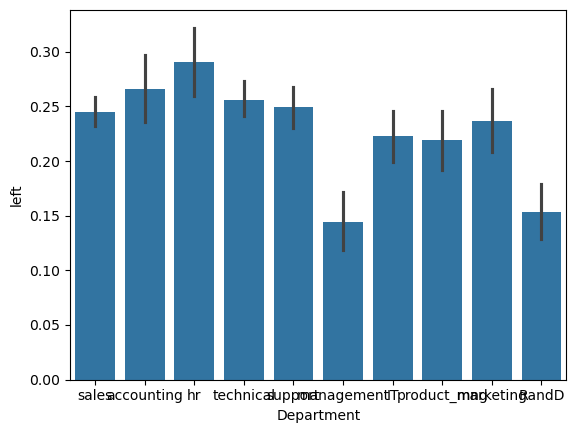

In [32]:
sns.barplot(x='Department', y='left', data=df, estimator=lambda x: sum(x==1)/len(x))

> Salary vs Retention

In [19]:
pd.crosstab(df['salary'], df['left'], normalize='index') *100

left,0,1
salary,,
high,93.371059,6.628941
low,70.311646,29.688354
medium,79.568725,20.431275


<Axes: xlabel='salary', ylabel='left'>

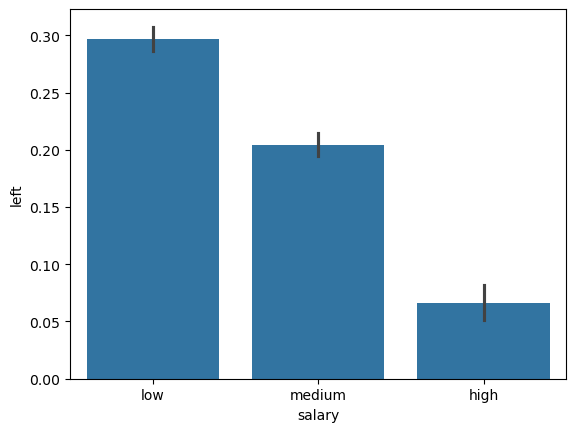

In [20]:
sns.barplot(x ='salary', y='left', data=df, estimator=lambda x: sum(x==1)/len(x))

#### 1. Numerical Variables vs. Retention

> Retention vs satisfaction_level

<Axes: xlabel='left', ylabel='satisfaction_level'>

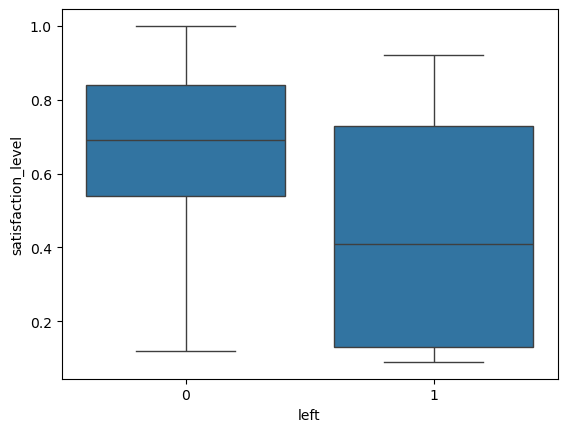

In [22]:
sns.boxplot(x='left', y='satisfaction_level',data=df)

> Retention vs last_evaluation

<Axes: xlabel='left', ylabel='last_evaluation'>

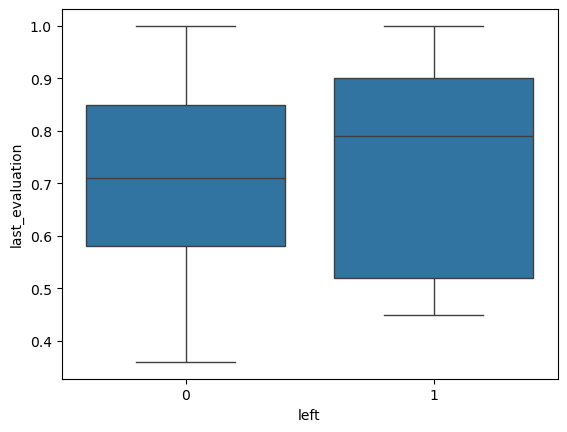

In [24]:
sns.boxplot(x='left', y='last_evaluation', data=df)

> Retention vs number_project

<Axes: xlabel='left', ylabel='number_project'>

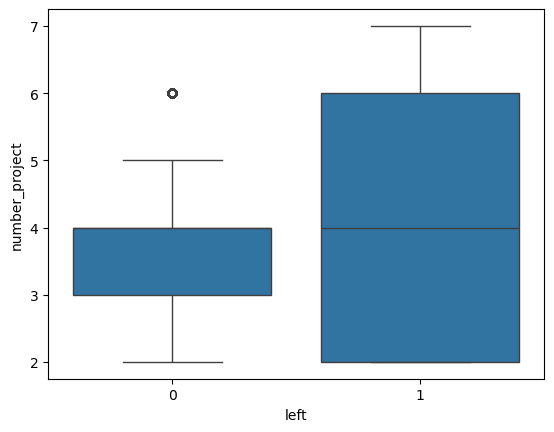

In [25]:
sns.boxplot(x='left', y='number_project', data=df)

> Retention vs average_montly_hours

<Axes: xlabel='left', ylabel='average_montly_hours'>

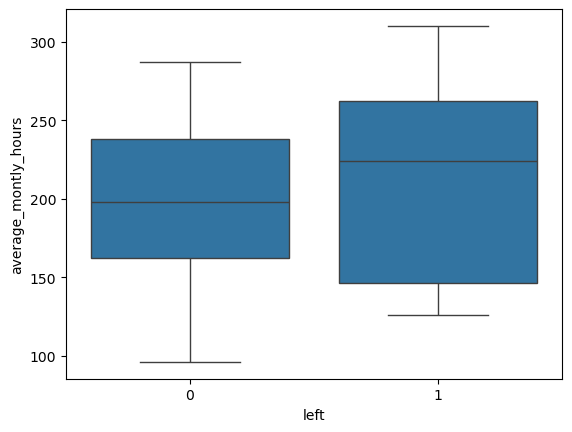

In [26]:
sns.boxplot(x='left', y='average_montly_hours', data=df)

> Retention vs time_spend_company

<Axes: xlabel='left', ylabel='time_spend_company'>

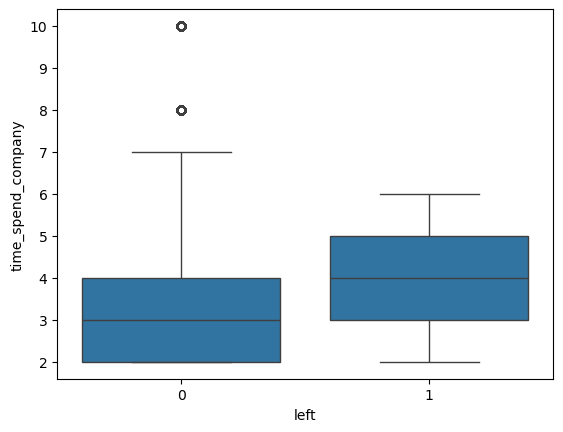

In [27]:
sns.boxplot(x='left', y='time_spend_company', data=df)

> Retention vs Work_accident

<Axes: xlabel='left', ylabel='Work_accident'>

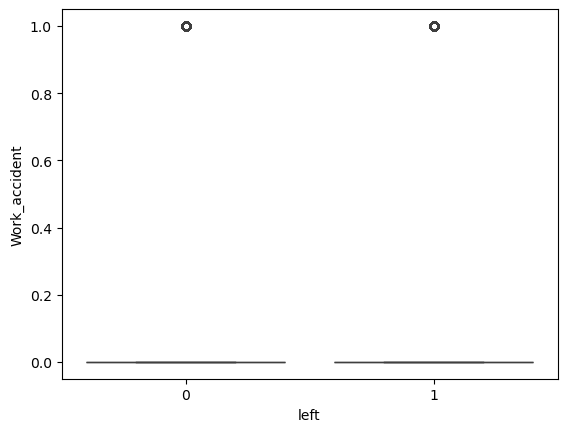

In [28]:
sns.boxplot(x='left', y='Work_accident', data=df)

> Retention vs promotion_last_5years

<Axes: xlabel='left', ylabel='promotion_last_5years'>

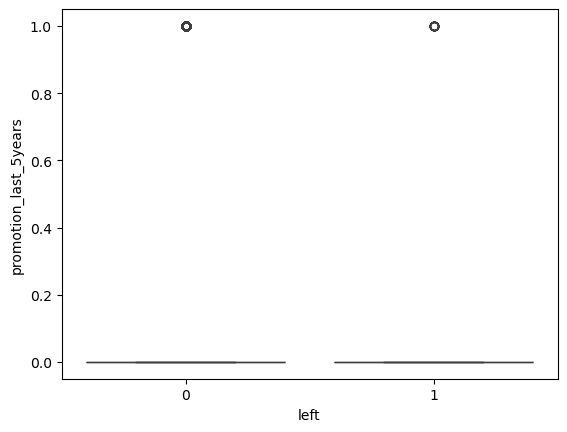

In [29]:
sns.boxplot(x='left', y='promotion_last_5years', data=df)